# Question 1

## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Define McCulloch-Pitts neuron class

In [ ]:
class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights    # Define weights
        self.threshold = threshold    # Define threshold

    def model(self, x):
        # Define model with threshold
        return 1 if (self.weights @ x) >= self.threshold else 0

## Define model for dataset

In [ ]:
def Area(A, B, C, point): # point : (x, y)
    neur1 = McCulloch_Pitts_neuron([B[1] - A[1], A[0] - B[0]], -(B[0]*A[1] - B[1]*A[0])) # AB
    neur2 = McCulloch_Pitts_neuron([C[1] - B[1], B[0] - C[0]], -(C[0]*B[1] - C[1]*B[0])) # BC
    neur3 = McCulloch_Pitts_neuron([A[1] - C[1], C[0] - A[0]], -(A[0]*C[1] - A[1]*C[0])) # CA
    neur4 = McCulloch_Pitts_neuron([1, 1, 1], 3)

    z1 = neur1.model(np.array(point))
    z2 = neur2.model(np.array(point))
    z3 = neur3.model(np.array(point))
    z4 = neur4.model(np.array([z1, z2, z3]))

    return z4

## Triangle vertices

In [ ]:
A = (2, 2)
B = (3, 0)
C = (1, 0)

## Generate random data points

In [ ]:
num_points = 2000
x_values = np.random.uniform(-1, 5, num_points)  # Updated x-axis limits
y_values = np.random.uniform(-1, 5, num_points)  # Updated y-axis limits

## Initialize lists to store data points for different z4 values

In [ ]:
red_points = []
green_points = []

## Evaluate data points using the Area function

In [ ]:
for i in range(num_points):
    z4_value = Area(A, B, C, (x_values[i], y_values[i]))
    if z4_value == 0:  # z4 value is 0
        red_points.append((x_values[i], y_values[i]))
    else:  # z4 value is 1
        green_points.append((x_values[i], y_values[i]))

## Separate x and y values for red and green points

In [ ]:
if red_points:
    red_x, red_y = zip(*red_points)
if green_points:
    green_x, green_y = zip(*green_points)

## Plot the results

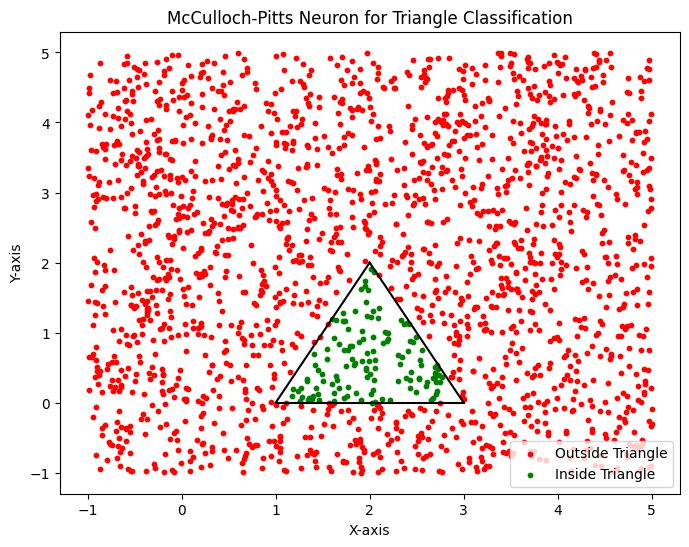

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, c='red', label='Outside Triangle', s=10)
plt.scatter(green_x, green_y, c='green', label='Inside Triangle', s=10)
plt.plot([A[0], B[0]], [A[1], B[1]], 'k-')
plt.plot([B[0], C[0]], [B[1], C[1]], 'k-')
plt.plot([C[0], A[0]], [C[1], A[1]], 'k-')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('McCulloch-Pitts Neuron for Triangle Classification')
plt.show()

## Analysis of results

In [ ]:
print("Total Points Generated:", num_points)
print("Points Inside Triangle:", len(green_points))
print("Points Outside Triangle:", len(red_points))
print("Percentage Inside:", (len(green_points) / num_points) * 100, "%")
print("Percentage Outside:", (len(red_points) / num_points) * 100, "%")

Total Points Generated: 2000
Points Inside Triangle: 127
Points Outside Triangle: 1873
Percentage Inside: 6.35 %
Percentage Outside: 93.65 %
